![](http://nci.org.au/wp-content/themes/nci/img/img-logo-large.png)

-------

# Web Map Service (WMS)
## Requesting map images through NCI's GSKY Data Server
NCI's GSKY Data Server supports the Open Geospatial Consortium (OGC) Web Map Service (WMS), which is a standard protocol for serving geospatial data as images (e.g., PNG).   


### In this notebook:

#### How to use the Open Geospatial Consortium (OGC) Web Map Service (WMS) protocol through NCI's GSKY data server:
- <a href='#wms_getmap'> Constructing WMS Requests</a>
- <a href='#wms_python'> Using GKSY's WMS in Python</a>
    

#### The following material uses Geoscience Australia's Earth Observation Collection. Additional information about this data collection can be found [here](https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/3a2cd509-0e82-4381-98c7-522756da533b).

---------

<br>


<a id='wms_getmap'></a> 
## Constructing WMS Requests

To request a spatial subset of data through GSKY using WMS, a **GetMap** URL defining the subset has to be constructing. Then this URL can be used within a web browser to communicate to the GSKY Data Server, which will return the requested map image of the subset. 

#### For example, the **GetMap** request takes the following form:

> `http://gsky.nci.org.au/ows?`<FONT COLOR="red">service</FONT>=WMS&<FONT 
COLOR="red">version</FONT>=1.3.0&<FONT 
COLOR="red">request</FONT>=GetMap&<FONT 
COLOR="red">layers</FONT>=<FONT 
COLOR="#00cc99">value</FONT>&<FONT 
COLOR="red">crs</FONT>=<FONT 
COLOR="#00cc99">value</FONT>&<br/><FONT COLOR="red">styles</FONT>=<FONT 
COLOR="#00cc99">value</FONT>&<FONT
COLOR="red">format</FONT>=<FONT 
COLOR="#00cc99">value</FONT>&<FONT
COLOR="red">bbox</FONT>=<FONT 
COLOR="#00cc99">value</FONT>&<FONT 
COLOR="red">width</FONT>=<FONT 
COLOR="#00cc99">value</FONT>&<FONT 
COLOR="red">height</FONT>=<FONT 
COLOR="#00cc99">value</FONT>&<br/><FONT COLOR="blue">colorscalerange</FONT>=<FONT 
COLOR="#00cc99">value</FONT>&<FONT 
COLOR="blue">transparent</FONT>=<FONT 
COLOR="#00cc99">value</FONT>&<FONT 
COLOR="blue">time</FONT>=<FONT 
COLOR="#00cc99">value</FONT>

where <FONT COLOR="red">red</FONT> indicates required fields, <FONT COLOR="blue">blue</FONT> are optional, and <FONT COLOR="00cc99">green</FONT> are where inputs values relevant to the dataset and user request need to be defined. 



#### GetMap parameters:

|Parameter    |  Required/Optional  |  Input                                                            |
|-------------|:-------------------:|------------------                                                 |
|service      |     Required        |      WMS                                                          |
|version      |     Required        |  `1.1.1**`, `1.3.0 (default)`                                     |
|request      |     Required        | `GetMap`                                                          |
|layers       |     Required        | `<variable>`                                                      |
|crs          |     Required        | `<crs_value>`                                                     |
|styles       |     Required        | `<style_name>`                                                    |
|format       |     Required        | `image/png `, `image/png;mode=32bit `, `image/gif `, `image/jpeg `|
|bbox         |     Required        | `<ymin,xmin,ymax,xmax>`                                           |
|width        |     Required        | Image width in pixels                                             |
|height       |     Required        | Image height in pixels                                            |
|colorscalerange |  Optional        | `<min,max>`                                                       |
|transparent  |     Optional        | True, False                                                       |
|time         |     Optional        | `<time_value>`                                                    |





`**`**Syntax differences for v1.1.1 GetMap requests:**
- Use `srs` in place of `crs`
- The order of `bbox` values is: `<xmin,ymin,xmax,ymax>`


<br>

### WMS GetCapabilities Request

#### Where do you find valid input values?
In order to contruct the **GetMap** URL, a **GetCapabilities** request can be made to the server. This requests returns a xml describing the available WMS parameters (metadata, services, and data) made available by NCI's GSKY server. 

**GetCapabilities example:**

> [http://gsky.nci.org.au/ows?service=WMS&version=1.3.0&request=GetCapabilities<br/>](http://gsky.nci.org.au/ows?service=WMS&version=1.3.0&request=GetCapabilities)

<img src="./gsky_wms1.png">

### GetMap Request 
Using the information returned from a GetCapabilities request, a GetMap URL can be constructed and then entered into the address bar of any web browser.  

#### Example GetMap request:

> [http://gsky.nci.org.au/ows?<br/>
service=WMS&<br/>
layers=LS7:NBAR:TRUE&<br/>
service=WMS&<br/>
crs=EPSG:4326&<br/>
format=image/png&<br/>
request=GetMap&<br/>
height=256&<br/>
width=256&<br/>
version=1.3.0&<br/>
bbox=-37,148,-34,151&<br/>
time=1999-08-05T00:00:00.000Z&<br/>
transparent=FALSE
](http://130.56.242.16/ows?SERVICE=WMS&&layers=LS7%3ANBAR%3ATRUE&styles=&service=WMS&crs=EPSG%3A4326&format=image%2Fpng&request=GetMap&bgcolor=0xFFFFFF&height=600&width=1200&version=1.3.0&bbox=-35.3075%2C149.12441666666666%2C-35.1%2C151&time=1999-08-05T00%3A00%3A00.000Z&exceptions=XML&transparent=FALSE)


#### If the URL is correctly formed, the requested map will be displayed.
<img src="./gsky_wms2.png" width=600>

<a id='wms_python'></a> 
## Using GSKY's WMS in Python
Many tools are available to perform the above steps less manually. In particular, Python's OWSLib library can be used with GSKY's WMS. 

### The following libraries will need to be imported for the below example. 

In [1]:
from owslib.wms import WebMapService
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

### To start, we will need the base GSKY server URL:

In [2]:
gsky_url = 'http://gsky.nci.org.au/ows'

### Now using OWSLib, you can begin by inspecting the service metadata:

In [3]:
wms = WebMapService(gsky_url, version='1.3.0')

#### Find out the available data layers that can be requested:

In [4]:
for layer in list(wms.contents):
    print "Layer Name:", wms[layer].name
    print "Title:", wms[layer].title, '\n'

Layer Name: LS5:NBAR:FALSE
Title: DEA Landsat 5 surface reflectance false colour 

Layer Name: LS5:NBAR:TRUE
Title: DEA Landsat 5 surface reflectance true colour 

Layer Name: LS5:NBART:FALSE
Title: DEA Landsat 5 terrain corrected surface reflectance false colour 

Layer Name: LS5:NBART:TRUE
Title: DEA Landsat 5 terrain corrected surface reflectance true colour 

Layer Name: LS7:NBAR:FALSE
Title: DEA Landsat 7 surface reflectance false colour 

Layer Name: LS7:NBAR:TRUE
Title: DEA Landsat 7 surface reflectance true colour 

Layer Name: LS7:NBART:FALSE
Title: DEA Landsat 7 terrain corrected surface reflectance false colour 

Layer Name: LS7:NBART:TRUE
Title: DEA Landsat 7 terrain corrected surface reflectance true colour 

Layer Name: LS8:NBAR:FALSE
Title: DEA Landsat 8 surface reflectance false colour 

Layer Name: LS8:NBAR:TRUE
Title: DEA Landsat 8 surface reflectance true colour 

Layer Name: LS8:NBART:FALSE
Title: DEA Landsat 8 terrain corrected surface reflectance false colour 

La

#### We can also view metadata that is available about a selected layer. For example, you can view the abstract associated with that data layer. 

In [5]:
layer = "LS7:NBAR:TRUE"

In [6]:
print(wms[layer].abstract)

This product has been corrected to remove the influences of the atmosphere, the time of year and satellite view angles using the methods described in Li et al. 2010 https://doi.org/10.1109/JSTARS.2010.2042281. Landsat 7 Enhanced Thematic Mapper (ETM+) data is available from May 1999 and onwards. Please note that images from 1st of June 2003 are affected by the failure of scan line corrector which results in strips of missing data. More detailed information about the surface reflectance product suite produced using Digital Earth Australia including CCBY4.0 is available at  http://dx.doi.org/10.4225/25/5a7a501e1c5af. This service provides access to Landsat 7 ETM+ surface reflectance data. The true colour composite is composed of wavelengths of light as seen by the human eye. The image composites are made from images acquired within a 16 day period, and may include clouds.


#### Or view the CRS options, bounding box, and time positions available (these details will be needed to construct the GetMap request). 

In [7]:
print "CRS Options: "
crs = wms[layer].crsOptions
print '\t', crs, '\n'
    
print "Bounding Box: "
bbox = wms[layer].boundingBox
print '\t', bbox, '\n'
    
print "Time Positions: "
time = wms[layer].timepositions
print '\t', time[:10], '\n'

CRS Options: 
	['EPSG:4326', 'EPSG:WGS84(DD)', 'CRS:84', 'EPSG:3857'] 

Bounding Box: 
	(-180.0, -90.0, 180.0, 90.0, 'CRS:84') 

Time Positions: 
	['1999-05-01T00:00:00.000Z', '1999-05-17T00:00:00.000Z', '1999-06-02T00:00:00.000Z', '1999-06-18T00:00:00.000Z', '1999-07-04T00:00:00.000Z', '1999-07-20T00:00:00.000Z', '1999-08-05T00:00:00.000Z', '1999-08-21T00:00:00.000Z', '1999-09-06T00:00:00.000Z', '1999-09-22T00:00:00.000Z'] 



### Now let's use the information above to construct and make the GetMap request

#### We'll need to define a bounding box for our request:

In [8]:
subset_bbox = (148, -37, 151, -34)

#### OWSLib's library can now be used to make the GetMap request:

In [9]:
output = wms.getmap(layers=[layer],
                        srs=crs[0], 
                        bbox=(subset_bbox[0], subset_bbox[1], subset_bbox[2], subset_bbox[3]),
                        size=(256, 256), 
                        format='image/png',
                        time=time[6]
                        )

#### To view the above constructed URL:

In [10]:
print(output.geturl())

http://gsky.nci.org.au/ows?SERVICE=WMS&layers=LS7%3ANBAR%3ATRUE&styles=&service=WMS&crs=EPSG%3A4326&format=image%2Fpng&request=GetMap&bgcolor=0xFFFFFF&height=256&width=256&version=1.3.0&bbox=-37%2C148%2C-34%2C151&time=1999-08-05T00%3A00%3A00.000Z&exceptions=XML&transparent=FALSE


#### Lastly, we need to write the GetMap result to a file:

In [11]:
pngfile = 'gsky_getMap.png'
with open(pngfile, 'wb') as out:
    out.write(output.read())

#### And if we'd like to confirm the result:

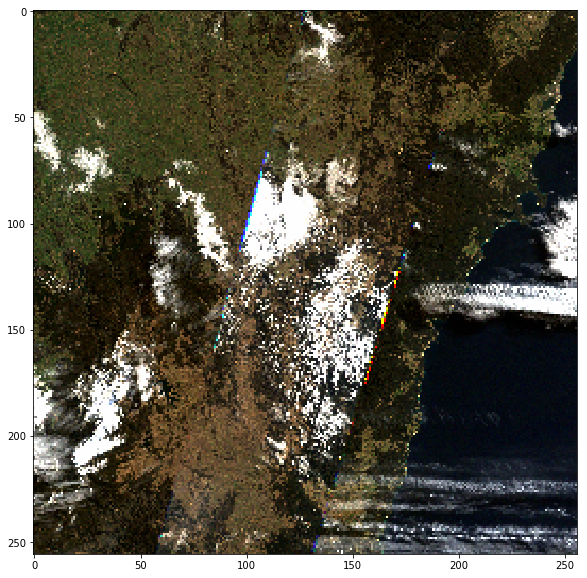

In [12]:
im = Image.open(pngfile)
plt.figure(figsize=(10, 10))
plt.imshow(im)

<br>
<br>
<br>


--------
**For more information on the OGC WMS standard specifications and the Python OWSLib package:** <br \>
http://www.opengeospatial.org/standards/wms <br \>
https://geopython.github.io/OWSLib/#wms <br \>
